# Assignment 06

In [1]:
# import the data
# sep x,y
# find out the coef , intercept
# y = m1*x1 + m2*x2 + m3*x3 + c

#KNN Regressor


# calculate r2_score
#compared

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Encoder

In [5]:
df.sex = df.sex.replace(df.sex.unique(), [i for i in range(len(df.sex.unique()))])
df.smoker = df.smoker.replace(df.smoker.unique(), [i for i in range(len(df.smoker.unique()))])
df.region = df.region.replace(df.region.unique(), [i for i in range(len(df.region.unique()))])

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [7]:
Y = df['charges']
X = df.drop('charges', axis='columns')

In [8]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,0,0
1,18,1,33.770,1,1,1
2,28,1,33.000,3,1,1
3,33,1,22.705,0,1,2
4,32,1,28.880,0,1,2


In [9]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [10]:
n = X.shape[0]

In [11]:
m = np.zeros(len(X.columns))
c = 0
sumV = m.copy()
learning_rate = 0.0001

In [12]:
X.shape, X.shape

((1338, 6), (1338, 6))

In [13]:
x = np.array(X)
y = np.array(Y)

In [14]:
for i in range(2000):
    pred = np.sum(m*x + c, axis = 1)
    error = y - pred
    
    sumValue = sumV.copy()
    sum2 = 0
    for j in range(n):
        sumValue += error[j] * x[j]
        sum2 += error[j]

    der_m = (-2/n) * sumValue
    der_c = (-2/n) * sum2

    m = m - learning_rate*der_m
    c = c - learning_rate*der_c
    # print(m, c)
print(m, c)

[  216.7939422     96.37554963   205.05085324   191.81842725
 -1551.57782681    13.24217715] -67.08877688942596


In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [16]:
np.sum(m * x[3] + c)

9978.629131177458

In [17]:
pred1 = np.sum((m * x + c), axis = 1)

In [18]:
len(pred1)

1338

In [19]:
accuracy_lr_hand_made = r2_score(Y, pred1)
accuracy_lr_hand_made

0.19319741912693822

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(X, Y)

LinearRegression()

In [23]:
lr.coef_

array([   257.28807486,   -131.11057962,    332.57013224,    479.36939355,
       -23820.43412267,    353.64001656])

In [24]:
lr.intercept_

10944.061751765043

In [25]:
pred2 = lr.predict(X)

In [26]:
accuracy_lr = r2_score(Y, pred2)
accuracy_lr

0.7507372027994937

KNN Regressor

In [27]:
from sklearn.neighbors import KNeighborsRegressor

In [28]:
knn = KNeighborsRegressor(n_neighbors=3)

In [29]:
knn.fit(X, Y)

KNeighborsRegressor(n_neighbors=3)

In [30]:
pred = knn.predict(X)

In [31]:
accuracy = r2_score(Y, pred)
accuracy

0.5730808885615326

Compare

<AxesSubplot:xlabel='Accuracy', ylabel='Algorithm Name'>

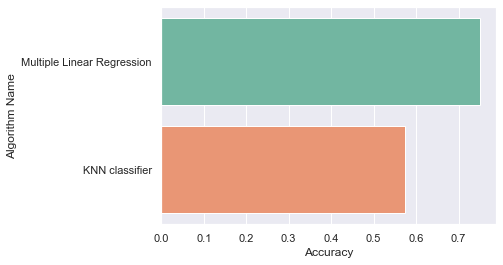

In [32]:
data = {
    'Algorithm Name' : ['Multiple Linear Regression', 'KNN classifier'],
    'Accuracy': [accuracy_lr, accuracy]
}
accuracy_df = pd.DataFrame(data)
sns.set()
sns.barplot(y = "Algorithm Name", x = "Accuracy", data=accuracy_df, palette="Set2")
# sns.set(rc = {'figure.figsize':(15:5)})